In [1]:
# Baixando as bibliotecas necessarias para o script
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a base de dados
df_base = pd.read_excel('Dados.xlsx')

In [3]:
# Verificando o Dataframe
df_base.head(5)

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [4]:
# Verficando o tipo dos dados
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [5]:
# Criando colunas para separar o dia e o mes
df = df_base.copy()
df['dia'] = df_base['Data'].dt.day
df['mes'] = df_base['Data'].dt.month
df.head(5)

,Data,Vendas,dia,mes
0,2022-12-06,870,6,12
1,2022-12-07,868,7,12
2,2022-12-08,1189,8,12
3,2022-12-09,742,9,12
4,2022-12-10,317,10,12


In [6]:
# Criando um loop para adcionar o dia da semana e seu numero
dia_semana_num = []
dia_semana_nome = []

for i in df.Data:
    temp = pd.Timestamp(i)
    dia_semana_num.append(temp.dayofweek)
    dia_semana_nome.append(temp.day_name())
    
# Anexando
df['dia_semana_num'] = dia_semana_num
df['dia_semana_nome'] = dia_semana_nome

In [7]:
# Criando um loop for pra destacar as semanas da base de dados
semana = []
x = df['Data'].dt.to_period('W-SUN')
num = 1

for i in range(len(x)):
    if x[i] == x[0] or x[i] == x[i-1]:
        semana.append(num)
    else:
        num += 1
        semana.append(num)   

In [8]:
# Adcionando a semana ao Dataframe
df['semana']= semana

In [9]:
# Reordenando as colunas do DataFrame
df = df.reindex(columns=['Data','dia','semana','mes','dia_semana_num','dia_semana_nome','Vendas'])
df.head()

,Data,dia,semana,mes,dia_semana_num,dia_semana_nome,Vendas
0,2022-12-06,6,1,12,1,Tuesday,870
1,2022-12-07,7,1,12,2,Wednesday,868
2,2022-12-08,8,1,12,3,Thursday,1189
3,2022-12-09,9,1,12,4,Friday,742
4,2022-12-10,10,1,12,5,Saturday,317


In [10]:
# Verificando as medidas basicas para as vendas por dia da semana
df.groupby('dia_semana_num')['Vendas'].describe()

,count,mean,std,min,25%,50%,75%,max
dia_semana_num,,,,,,,,
0,6.0,1176.666667,345.015748,814.0,878.25,1183.5,1353.75,1692.0
1,7.0,849.857143,231.254858,572.0,695.00,807.0,983.50,1213.0
2,7.0,862.000000,276.370524,429.0,728.50,868.0,989.00,1302.0
3,7.0,1154.000000,259.863426,638.0,1099.00,1229.0,1304.00,1405.0
4,7.0,622.285714,388.673262,18.0,424.00,821.0,862.00,945.0
5,6.0,209.833333,129.388433,40.0,100.50,264.5,310.00,319.0
6,6.0,335.666667,242.688003,67.0,166.75,276.0,503.75,685.0


In [11]:
# Verificando as medidas basicas para as vendas por semana
df.groupby('semana')['Vendas'].describe()

,count,mean,std,min,25%,50%,75%,max
semana,,,,,,,,
1,6.0,778.500000,285.639458,317.0,699.25,805.0,869.5,1189.0
2,7.0,897.714286,486.108943,235.0,536.00,1055.0,1278.0,1366.0
3,7.0,520.000000,464.532023,18.0,53.50,711.0,877.0,1050.0
4,7.0,394.857143,298.834641,54.0,125.00,429.0,605.0,821.0
5,7.0,698.714286,316.201789,317.0,499.00,712.0,817.5,1229.0
6,7.0,865.571429,363.532602,289.0,686.50,892.0,1094.0,1317.0
7,5.0,1288.200000,287.763271,945.0,1097.00,1302.0,1405.0,1692.0


## Realizando algumas verficações por gráficos

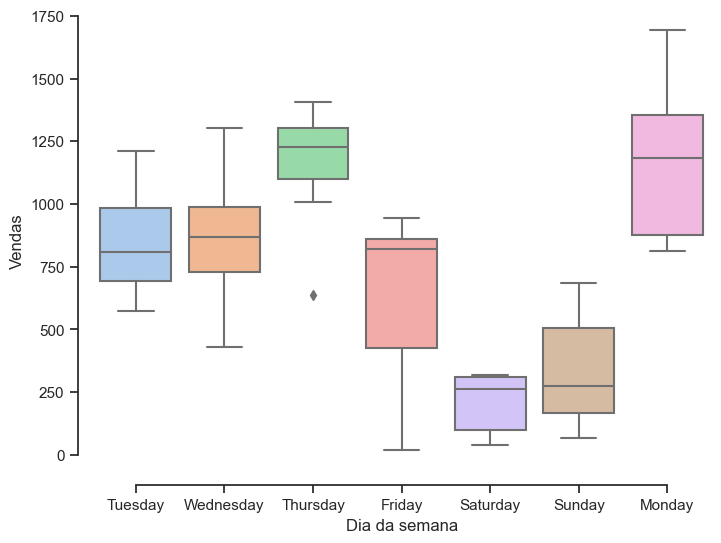

In [12]:
# Criando um plot pra verificar a existência de outliers nos dias da semana
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(8,6))

# plot

sns.boxplot(x = df.dia_semana_nome, y = df.Vendas, data=df)
sns.despine(offset=10, trim=True)
ax.xaxis.set_label_text("Dia da semana")
ax.yaxis.set_label_text("Vendas")
plt.show()

Nota-se que, em geral, os dados não possuem extremidades e os valores estão dentro da linha de correção

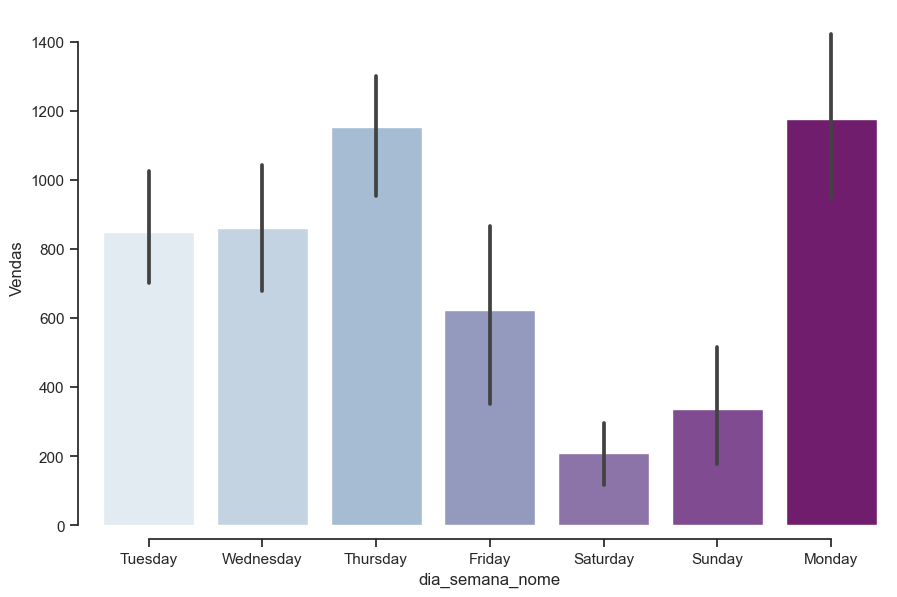

In [13]:
# Criando um gráfico para a distribuição de vendas ao longo dos dias da semana

sns.catplot(x="dia_semana_nome", y="Vendas", data=df, kind="bar", palette="BuPu",
            height=6, aspect=1.5)
sns.despine(offset=10, trim=True)
plt.show()

Pelo gráfico, conseguimos notar que os melhores dias de venda são quinta e segunda

## Verificando se existe disparidade entre as semanas do mês

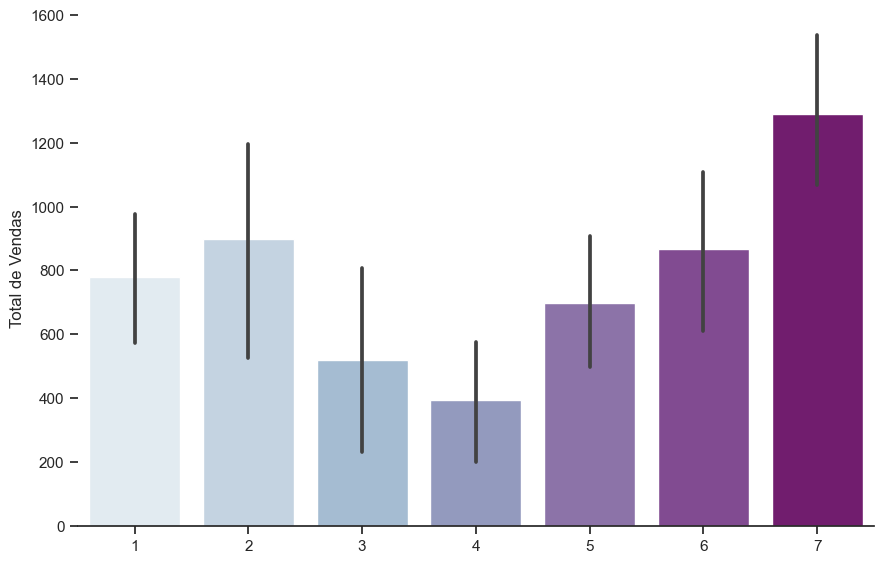

In [14]:
# Criando um gráfico para ver a distribuição por semana
g = sns.catplot(x="semana", y="Vendas", data=df, kind="bar", palette="BuPu",
            height=6, aspect=1.5)
g.despine(left=True)
g.set_axis_labels("", 'Total de Vendas')
plt.show()

# Realizando testes de previsões nos dados

In [15]:
# Baixando a biblioteca necessaria para fazer a previsão
!pip install pmdarima
from pmdarima.arima import auto_arima


In [16]:
# Importando novamente os dados, mas desta vez usando somente as duas colunas primarias
data_new = pd.read_excel('Dados.xlsx', parse_dates=['Data'], index_col='Data')
data_new.head()

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317


In [17]:
# Verificando se os dados são estacionarios
from pmdarima.arima import ADFTest 
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data_new)

(0.32861105775592603, True)

Conclui-se tanto pelo gráfico, quando pelo ADF teste, que os dados não são estacionarios

# Transformando os dados não estacionarios em estacionarios

In [18]:
# Criando outra base de dados e criando uma coluna que faz a diferenca de valor entre o dia anterior e o atual
data_stationary = data_new.copy()
data_stationary['Diferenca'] = data_stationary['Vendas'] - data_stationary['Vendas'].shift(1)

In [19]:
# Dropando a coluna vendas e retirando valores nulos
data_stationary = data_stationary.drop('Vendas', axis=1)
data_stationary = data_stationary.dropna()

In [20]:
# Verificando novamente se o dado é ou não estacionario
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data_stationary)

(0.01, False)

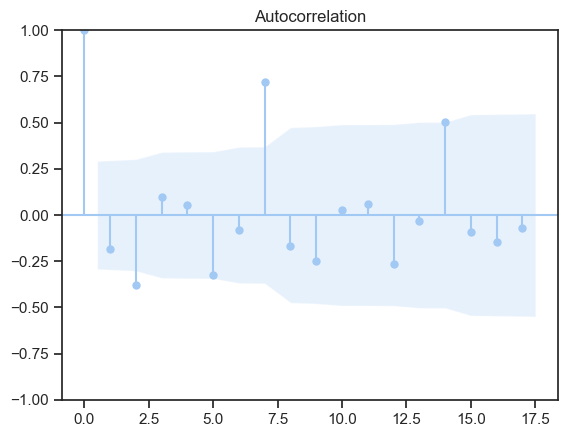

In [21]:
# Criando graficos de pirulitos para identificar padroes p e q

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_stationary)
plt.show()

C:\Users\junio\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


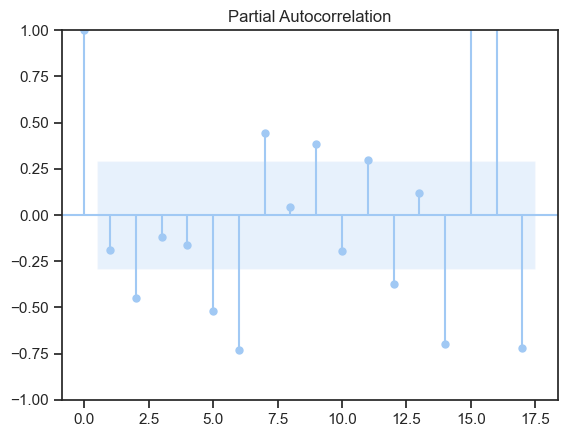

In [22]:
plot_pacf(data_stationary)
plt.show()

Como o teste mostrou, agora a hipotese de que os dados não sao estacionario é falsa

# Realizando previsoes com os dados corrigidos

In [23]:
# Criando o modelo com os parametros base,
# considero que a base de dados é diaria, por isso colocarei seasonalidade diaria
modelo = auto_arima(data_stationary, start_p = 1, start_q = 1, max_p = 1,max_q = 1,
                    m = 7, test = 'pp', seasonal = True, d = 1, D = 0,
                    trace = True, error_action = 'ignore',
                    suppress_warnings = True, stepwise = False)
# 625

# modelo = auto_arima(data_new, start_p=1, start_q=1, test='pp',
#                       max_p=6, max_q=6, m=7, seasonal=True, start_P=0, 
#                       D=0, trace=True, error_action='ignore',      
#                       suppress_warnings=True, stepwise=False) 
# # 510 



 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=707.521, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=670.326, Time=0.33 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=657.616, Time=0.51 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=659.408, Time=0.78 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=657.852, Time=0.71 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=659.526, Time=0.46 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=661.768, Time=0.87 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=622.453, Time=0

In [24]:
# verificando o indice com melhor perfomance
print(modelo.aic()) 

622.4532354809984


In [25]:
# Separando dados de treino e de teste com % 80 - 20
train = data_stationary.iloc[0:37]
test = data_stationary.iloc[37:]

In [26]:
# Treinando o modelo 
modelo.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 7),
      suppress_warnings=True)

In [27]:
# Fazendo predicoes
predicao = modelo.predict(n_periods = test.shape[0])
predicao = pd.DataFrame(predicao, index= test.index, columns = ['Diferenca'])

<AxesSubplot:xlabel='Data'>

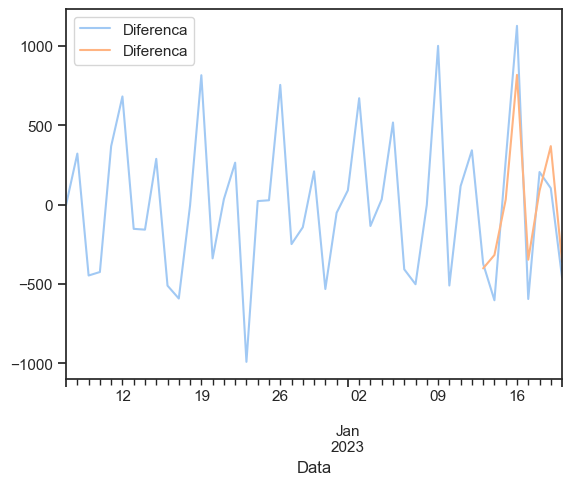

In [48]:
# Realizando um plot de comparacao dos dados previstos e reais
pd.concat([data_stationary, predicao], axis = 1).plot()

In [49]:
# Verificando os dados base da predicao
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 7)   Log Likelihood                -345.074
Date:                            Thu, 02 Feb 2023   AIC                            700.148
Time:                                    21:45:56   BIC                            709.708
Sample:                                         0   HQIC                           703.789
                                             - 51                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2394      0.388      0.616      0.538      -0.522       1.001
ma.L1         -1.0000      0.079    -12.675      0.000      -1.155      -0.845
ar.S.L7        0.3994      0.131      3.042      0.002       0.142       0.657
ar.S.L14       0.4280      0.147      2.905      0.004       0.139       0.717
sigma2      5.193e+04   1.52e-06   3.43e+10      0.000    5.19e+04    5.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.51   Jarque-Bera (JB):                44.17
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.73   Skew:                             1.10
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.43e+26. Standard errors may be unstable.
"""

In [50]:
# Verificando o indice de acuracia para o processo

from sklearn.metrics import r2_score
test['Predicao'] = predicao.Diferenca
print('Acuracia: ', r2_score(test['Diferenca'], test['Predicao']))

Acuracia:  0.8395060752124953


# ---------------------------------------------------

In [51]:
# data_new = pd.read_excel('Dados.xlsx', parse_dates=['Data'], index_col='Data')
data_final = pd.read_excel('Dados.xlsx')
data_validacao = data_final.copy()
data_validacao['Diferenca'] = data_final['Vendas'] - data_final['Vendas'].shift(1)

# Dropando a coluna vendas e retirando valores nulos
data_validacao = data_validacao.drop('Vendas', axis=1)
data_validacao = data_validacao.dropna()

In [54]:
futuro = [{'Data' : '2023-01-21', 'Diferenca' : ''},
         {'Data' : '2023-01-22', 'Diferenca' : ''},
         {'Data' : '2023-01-23', 'Diferenca' : ''},
         {'Data' : '2023-01-24', 'Diferenca' : ''},
         {'Data' : '2023-01-25', 'Diferenca' : ''}]

In [55]:
test2 = data_validacao.append(futuro, ignore_index=True)

C:\Users\junio\AppData\Local\Temp\ipykernel_3728\2100993342.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test2 = data_validacao.append(futuro, ignore_index=True)


In [56]:
test2["Data"] = pd.to_datetime(test2["Data"])
test2["Diferenca"] = pd.to_numeric(test2["Diferenca"])

In [57]:
test2 = test2.set_index('Data')
test2 = test2[36:]

In [58]:
test2.head()

,Diferenca
Data,
2023-01-12,342.0
2023-01-13,-373.0
2023-01-14,-603.0
2023-01-15,277.0
2023-01-16,1126.0


In [59]:
# Fazendo predicoes
modelo.update(test2)
predicao2 = modelo.predict(n_periods = test2.shape[0])
predicao2 = pd.DataFrame(predicao2, index= test2.index, columns = ['Diferenca'])

In [60]:
# ultimos 5 dados previstos
predicao2.tail()

,Diferenca
Data,
2023-01-21,-266.305975
2023-01-22,399.341753
2023-01-23,457.727009
2023-01-24,-234.028231
2023-01-25,209.672989


In [63]:
dados = data_new[-10:]
dados = dados.to_numpy()

dados2 = predicao2[-10:]
dados2 = dados2.to_numpy()

In [64]:
resul = []
for i in range(len(dados)):
    if i == 0:
        resul.append(0)
    else:
        soma = int(dados2[i] + dados[i-1])
        print(soma)
        resul.append(soma)

513
1465
1034
-67
299
2091
1554
1067
1614


In [69]:
resul = pd.DataFrame(resul, columns = ['Previsao Final'])
resul['Comparacao'] = data_final['Vendas' 